# Week 3 - Classification and Logistic Regression

## Classification Problems

### Regression vs Classification
Numeric Prediction:  
- models continuous-valued functions, i.e., predicts unknown or missing values 

Classification：  
- predicts categorical class labels (discrete or nominal)
classifies data (constructs a model) based on the training set and the values (class labels) in a classifying attribute and uses it in classifying new data.

### Classification
Typical applications
- Credit/loan approval
- Medical diagnosis: if a tumor is cancerous or benign
- Fraud detection: if a transaction is fraudulent
- Web page categorization: which category it is
- Email filtering: Spam or Ham

### Why different models?
Let's first consider a binary (yes or now, true or false, 0 or 1) classification problem:

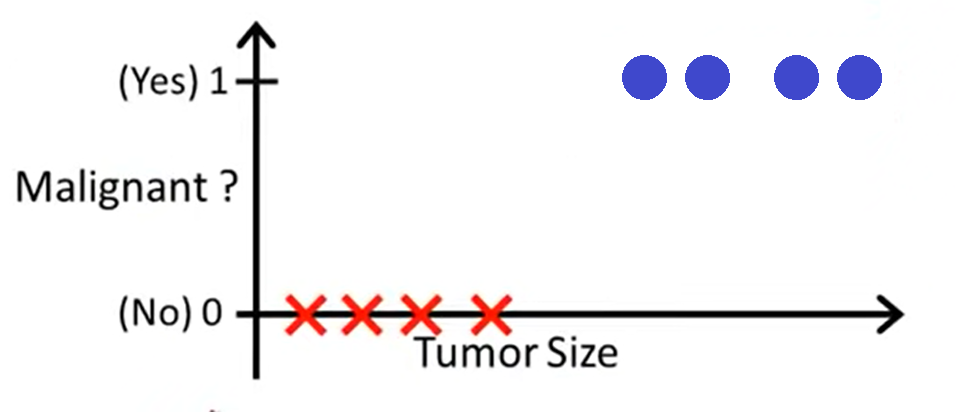



## Logistic Regression
A regression that is used for classification:
- Regression means it makes real-valued predictions
- Its value is between $[0,1]$ and can be interpreted as a probability.

The predictive function of logistic regression is defined as:
$$\hat y = f_\boldsymbol\theta(\mathbf{x}) = \sigma (\mathbf{x}^\intercal \boldsymbol \theta)$$
where $\sigma$ is known as the *logistic function* or the *sigmoid function*, and is defined as:
$$\sigma (z) = \frac{e^z}{1+ e^z} = \frac{1}{e^{-z} + 1}$$

$z = \mathbf{x}^\intercal \boldsymbol \theta$ is the *linear part*, similar to what we have seen in linear regression. The sigmoid function "shrinks" the unbounded linear part, which is $(-\infty, \infty)$ to the bounded range of $(0,1)$.

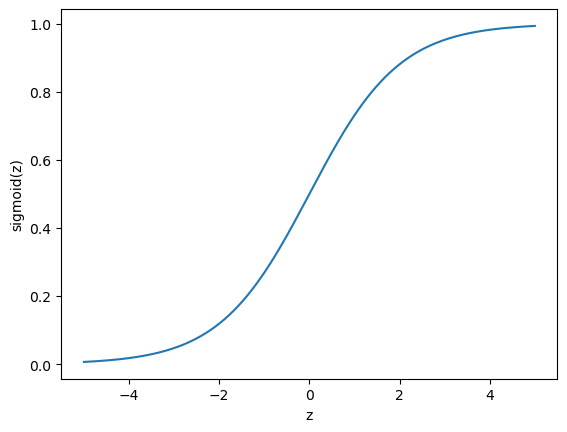

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# sigmoid function:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# visualize sigmoid
z = np.linspace(-5,5,200)
y = sigmoid(z)
plt.plot(z,y)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.show()

### Interpretation of a Logistic Regression Model
In probability theory, *odds* refer to the ratio of the probability of an event occurring to the probability of the event not occurring. Mathematically, if $P(A)$ is the probability of event $A$ happening, then the odds of event $A$ are
$$\text{Odds of } A = \frac {P(A)}{1-P(A)}$$

Let $o = \text{Odds of } A $, and $p=P(A)$. By simply manipulating the equation:
$$
\begin{aligned}
o &= \frac {p}{1-p}\\
(1-p)\times o &= p\\
o - p \times o &= p \\
o &= p \times (1 + o)\\
p &= \frac{o}{1+o}
\end{aligned}
$$
We can see that the probability is just odds over one plus odds.

In logistic regression, the prediction:
$$\hat y = \frac{e^z}{ 1 + e^{z}}$$
- $e^z$ represents the odds;
- the linear part $z = \mathbf{x}^\intercal \boldsymbol \theta = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n$ is called the *logit*.

The bigger the logit
- the higher the odds, and
- the higher the probability that the model predicts $P(y=1)$.

### Confusion Matrix
In binary classification:
- True Positive (TP): The model correctly predicts the positive class.
- False Positive (FP): The model incorrectly predicts the positive class (Type I error).
- True Negative (TN): The model correctly predicts the negative class.
- False Negative (FN): The model incorrectly predicts the negative class (Type II error).

Confusion matrix:
|                 | Predicted Positive | Predicted Negative |
| --------------- | ------------------ | ------------------ |
| Actual Positive | TP                 | FN                 |
| Actual Negative | FP                 | TN                 |

Performance of a classifier:
- Accuracy:
    $$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
- Precision: $$\text{Precision} = \frac{TP}{TP + FP}$$
- Recall (Sensitivity, True Positive Rate):$$   \text{Recall} = \frac{TP}{TP + FN}$$
- False Positive Rate: $$\text{FPR} = \frac{FP}{FP + TN}$$
- Specificity: $$\text{Specificity} = \frac{TN}{TN + FP}$$
- F1-Score is the harmonic mean of precision and recall: $$\text{F1-Score} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}= 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

### Choosing the Threshold
We predict 1 if  $\hat y > t$.

What value should we choose for the threshold? Consider two examples:
- A model that classifies criminal vs non-criminal
- A model that predicts credit card default.
Sometimes accuracy isn't the best metric either.

### Receiver Operating Characteristic (ROC) Curve
The ROC curve plots TPR (y-axis) against FPR (x-axis) at various threshold levels.

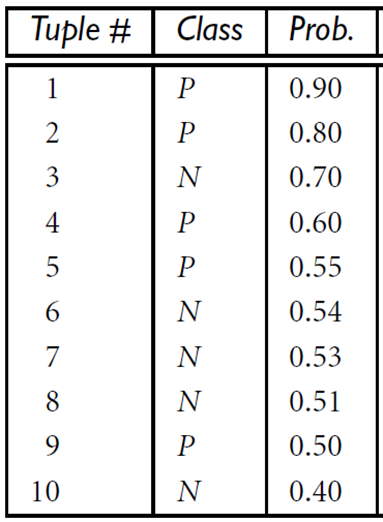
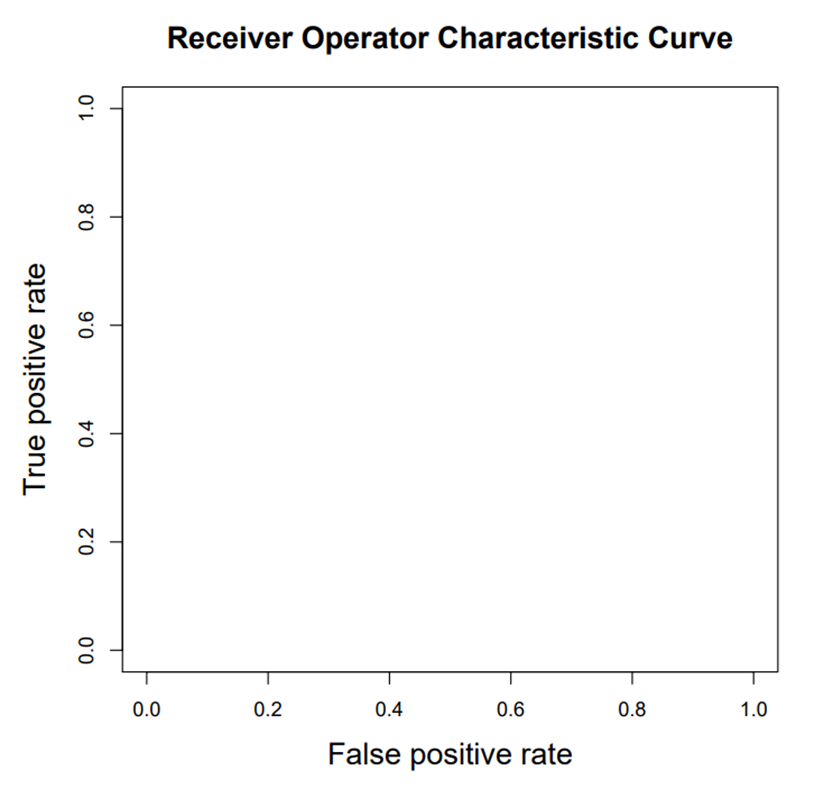


### Multi-Nomial Logistic Regression for Multi-Class Classification
When there are more than two possible outcomes, we need to extend our (binomial) logistic regression to multinomial logistic regression, also known as softmax regression. For each of the possible outcome $k\in K$, we also have a set of weights $\boldsymbol{\theta}_k$, with which we can calculate the logit for that outcome $k$ as $z_k = \mathbf{x}^\intercal \boldsymbol{\theta}_k$.

The probability of the event $k$ is predicted as 
$$\hat y_k = \frac{e^{z_k}}{\displaystyle\sum_{i\in K} e^{z_i}}$$

The odds of event $k$ over event $j$ is 
$$\frac{e^{z_k}}{e^{z_j}} = e^{z_k-z_j}$$





### The Error Function of Logistic Regression
Like linear regression, we also have an error function (loss function) for logistic regression. 

The likelihood of our model that gives the actual $\mathbf{y}$ is a product
$$\prod^m_{i=1} L(y_i, \hat y_i)$$
where $L(y, \hat y)$ is defined as
$$L(y, \hat y) = \begin{cases} 
\hat y & \text{if } y=1 \\
1-\hat y & \text{if } y = 0
\end{cases}$$

There are three things we need to do to create our error function:
- Working with the likelihood is hard because it's a product, but working with log-likelihood is easy because it's a sum. 
  $$\max_\boldsymbol\theta \sum^m_{i=1} \log(L(y_i, \hat y_i))$$
- To maximize the log-likelihood is to minimize the negative of it:
$$\min_\boldsymbol\theta \big(-\sum^m_{i=1} \log(L(y_i, \hat y_i))\big)$$
- The two cases function is hard to minimize
$$-\log (L(y, \hat y)) = \begin{cases} 
-\log(\hat y) & \text{if } y=1 \\
-\log(1-\hat y) & \text{if } y = 0
\end{cases}$$
but we can exploit the binary nature of the label y:
$$- \log (L(y, \hat y)) = -y\log(\hat y) - (1-y) \log(1-\hat y)$$

So, the overall error function for logistic regression is
$$\mathcal{J}_{\text{total}} = - \frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

Unlike linear regression, there is no closed-form solution for logistic regression. We find the solution through an iterative process called *gradient descent*.